In [ ]:
import pandas as pd

In [ ]:
userlog = pd.read_csv('use_log.csv')
customer = pd.read_csv('customer_master.csv')
class_master = pd.read_csv('class_master.csv')
campaign_master = pd.read_csv('campaign_master.csv')

userlog.head()

In [ ]:
customer.head(5)

In [ ]:
class_master.head()

In [ ]:
campaign_master.head()

In [ ]:
id(customer)

In [ ]:
customer_join = pd.merge(customer, class_master, on="class", how="left")
id(customer_join)

In [ ]:
customer_join.head()

In [ ]:
customer_join = pd.merge(customer_join, campaign_master, on="campaign_id", how="left")
id(customer_join)

In [ ]:
customer_join.head()

In [ ]:
customer.isnull().sum()

In [ ]:
customer_join.isnull().sum()

In [ ]:
customer_join.groupby("class_name").count()["customer_id"]

In [ ]:
customer_join.groupby("campaign_name").count()["customer_id"]

In [ ]:
customer_join.groupby("gender").count()["customer_id"]

In [ ]:
customer_join.groupby("is_deleted").count()["customer_id"]

In [ ]:
customer_join.dtypes

In [ ]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])

In [ ]:
customer_join.dtypes

In [ ]:
customer_start = customer_join.loc[customer_join["start_date"] > pd.to_datetime("20180401")]

In [ ]:
help(pd.DataFrame.loc)

In [ ]:
customer_join.loc[1, "class"]

In [ ]:
tf = [True, False]*2095

In [ ]:
customer_join.loc[tf]

In [ ]:
customer_join["end_date"] = pd.to_datetime(customer_join["end_date"])

In [ ]:
customer_join.dtypes

In [ ]:
customer_join.loc[
    (customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna()) 
]["end_date"]

In [ ]:
customer_join["end_date"] >= pd.to_datetime("20190331")

In [ ]:
customer_join["end_date"].isna()

In [ ]:
(customer_join["end_date"] >= pd.to_datetime("20190331")) or (customer_join["end_date"].isna())

In [ ]:
(customer_join["end_date"] >= pd.to_datetime("20190331"))

In [ ]:
type(list())

In [ ]:
test3 = list(range(0, 99))
test4 = list(range(2, 99, 3))

In [ ]:
test3[0] >= 0

In [ ]:
customer_join["start_date"] = pd.to_datetime(customer_join["start_date"])

In [ ]:
customer_join.head()

In [ ]:
customer_newer = customer_join.loc[(customer_join["end_date"] >= pd.to_datetime("20190331")) | (customer_join["end_date"].isna())]

In [ ]:
customer_newer.head(5)

In [ ]:
customer_newer.groupby("class_name").count()["customer_id"]

In [ ]:
customer_newer.groupby("campaign_id").count()["customer_id"]/2953

In [ ]:
customer_newer.groupby("gender").count()["customer_id"]

In [ ]:
userlog.head()

In [ ]:
userlog['usedate'] = pd.to_datetime(userlog['usedate'])
userlog['年月'] = userlog['usedate'].dt.strftime('%Y%m')

In [ ]:
uselog_month = userlog.groupby(['年月', 'customer_id'], as_index=False).count()
uselog_month

In [ ]:
uselog_month.rename(columns={"log_id":"count"}, inplace=True)
del uselog_month["usedate"]

In [ ]:
uselog_month.head()

In [ ]:
uselog_customer = uselog_month.groupby("customer_id").agg(["mean", "median", "min", "max"])["count"]

In [ ]:
uselog_customer

In [ ]:
userlog.dtypes

In [196]:
userlog.head()

,log_id,customer_id,usedate,年月,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [201]:
userlog["weekday"] = userlog["usedate"].dt.weekday
uselog_weekday = userlog.groupby(["customer_id", "年月", "weekday"], as_index=False).count()[["customer_id", "年月", "weekday", "log_id"]]
uselog_weekday.rename(columns={"log_id": "count"}, inplace=True)
uselog_weekday.head()

,customer_id,年月,weekday,count
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


In [202]:
uselog_weekday = uselog_weekday.groupby("customer_id", as_index=False).max()[["customer_id", "count"]]

In [203]:
uselog_weekday.head()

,customer_id,count
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5


In [207]:
uselog_weekday["routine_flg"] = 0
uselog_weekday.head()
uselog_weekday["routine_flg"] = uselog_weekday["routine_flg"].where(uselog_weekday["count"] < 4, 1)
uselog_weekday.head()

,customer_id,count,routine_flg
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1


In [209]:
# ひと月あたりにどれだけ訪れているか。会員AS002855だったら、平均4.5回、最大で7回訪れている月がある。
uselog_customer.head()

,mean,median,min,max
customer_id,,,,
AS002855,4.500000,5.0,2,7
AS008805,4.000000,4.0,1,8
AS009013,2.000000,2.0,2,2
AS009373,5.083333,5.0,3,7
AS015233,7.545455,7.0,4,11


In [210]:
customer_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常


In [211]:
customer_join2 = pd.merge(customer_join, uselog_customer, on="customer_id", how="left")
customer_join2.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,min,max
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,2,8
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,3,7
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,3,6
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,2,7
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,1,6


In [243]:
customer_join3 = pd.merge(customer_join2, uselog_weekday, on="customer_id", how="left")
customer_join3.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,min,max,count,routine_flg
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,2,8,4,1
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,3,7,5,1
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,3,6,5,1
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,2,7,5,1
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,1,6,5,1


In [214]:
customer_join3.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
min                 0
max                 0
count               0
routine_flg         0
dtype: int64

In [215]:
from dateutil.relativedelta import relativedelta

In [244]:
customer_join3["calc_date"] = customer_join3["end_date"]
customer_join3["calc_date"] = customer_join3["calc_date"].fillna(pd.to_datetime("20190430"))
customer_join3["membership_period"] = 0
customer_join3.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,min,max,count,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,2,8,4,1,2019-04-30,0
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,3,7,5,1,2019-04-30,0
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,3,6,5,1,2019-04-30,0
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,2,7,5,1,2019-04-30,0
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,1,6,5,1,2019-04-30,0


In [227]:
id(customer_join3)

140318301219808

In [252]:
for i in range(len(customer_join3)):
    delta = relativedelta(customer_join3["calc_date"].iloc[i], customer_join3["start_date"].iloc[i])
    # customer_join3["membership_period"].iloc[i] = delta.years*12 + delta.months
    customer_join3.loc[i, "membership_period"] = delta.years*12 + delta.months
customer_join3.head()
# id(customer_join3)

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,min,max,count,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,2,8,4,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,3,7,5,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,3,6,5,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,2,7,5,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,1,6,5,1,2019-04-30,47


In [247]:
customer_join3[["mean", "median", "max", "min"]].describe()

,mean,median,max,min
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [254]:
customer_join3.groupby("routine_flg").count()["customer_id"]

routine_flg
0     779
1    3413
Name: customer_id, dtype: int64

(array([857., 774., 395., 368., 311., 331., 323., 237., 288., 308.]),
 array([ 1. ,  5.6, 10.2, 14.8, 19.4, 24. , 28.6, 33.2, 37.8, 42.4, 47. ]),
 <BarContainer object of 10 artists>)

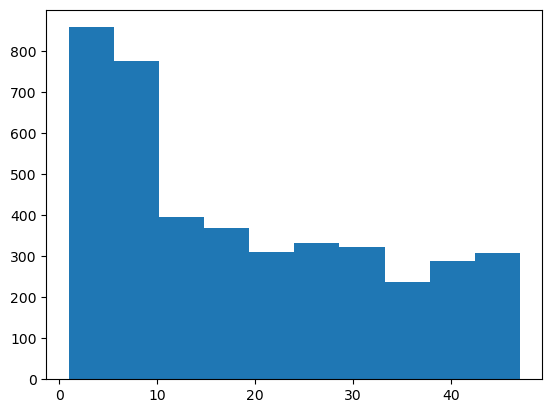

In [255]:
import matplotlib.pyplot as plt
plt.hist(customer_join3["membership_period"])

In [258]:
customer_end = customer_join3.loc[customer_join3["is_deleted"]==1]
customer_end.head()

customer_stay = customer_join3.loc[customer_join3["is_deleted"]==0]
customer_stay.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,min,max,count,routine_flg,calc_date,membership_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,5.0,2,8,4,1,2019-04-30,47
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,5.083333,5.0,3,7,5,1,2019-04-30,47
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.583333,5.0,3,6,5,1,2019-04-30,47
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,オールタイム,10500,通常,4.833333,4.5,2,7,5,1,2019-04-30,47
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,ナイト,6000,通常,3.916667,4.0,1,6,5,1,2019-04-30,47
